In [16]:
import easyocr
from PIL import Image, ImageOps


In [2]:
reader = easyocr.Reader(['en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


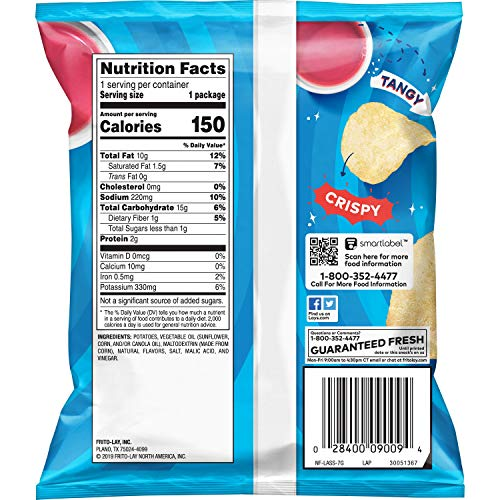

In [9]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("lays.jpg")
#im = PIL.Image.open("france.jfif")

im

In [11]:

# Doing OCR. Get bounding boxes.
bounds = reader.readtext('lays.jpg')
bounds

[([[99, 61], [229, 61], [229, 77], [99, 77]],
  'Nutrition Facts',
  0.10998833179473877),
 ([[381.3351366892331, 63.07460143262562],
   [432.99289098526896, 89.79359372515387],
   [420.6648633107669, 112.92539856737437],
   [369.00710901473104, 86.20640627484613]],
  'IANG}',
  0.22677281498908997),
 ([[152, 80], [190, 80], [190, 88], [152, 88]], 'I07e', 8.421356056942386e-09),
 ([[106, 82], [136, 82], [136, 88], [106, 88]],
  '7el[4r5',
  6.5731187159912e-10),
 ([[98, 88], [145, 88], [145, 102], [98, 102]],
  'Serving site',
  0.3977508544921875),
 ([[193, 89], [229, 89], [229, 103], [193, 103]],
  'package',
  0.35030683875083923),
 ([[188, 112], [228, 112], [228, 136], [188, 136]], '150', 0.9431566596031189),
 ([[99, 117], [165, 117], [165, 135], [99, 135]],
  'Calories',
  0.9858765006065369),
 ([[190, 142], [226, 142], [226, 148], [190, 148]],
  'dillraMlura',
  8.470143075101078e-05),
 ([[106, 162], [166, 162], [166, 170], [106, 170]],
  's3lle lful 1er',
  1.681638309491973e-06

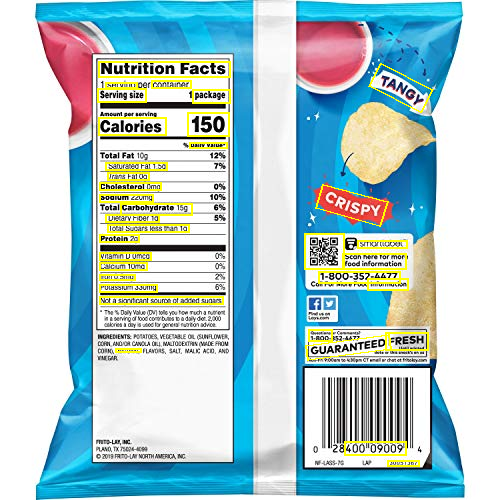

In [12]:

# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [13]:
len(bounds)

34

In [14]:
for i in bounds:
    print(i[1])

Nutrition Facts
IANG}
I07e
7el[4r5
Serving site
package
150
Calories
dillraMlura
s3lle lful 1er
Tjars Fala
chalelarel Tili
CRISPY
addium gelullu
Carbalydrato IG
sta5l8r1a
TzelE_ciar3 ks0ar|
&iss
Pretan7-
arluglg1
Mlsnauncr
Secairter atinnr
cacum luc
1:800-352-4477
frrlnl
freanatle
Pulagl laull0"
Hlaslailrirl uluirMsacal sllni
Hfar
FRESH
LGUARANTEED
r
quulu9uus
aunaln


In [19]:
im = Image.open('lays.jpg')
r = ImageOps.autocontrast(im.convert('L').point(lambda x: 255 if x > 254 else 0))
r.save('laysmodified.jpg')

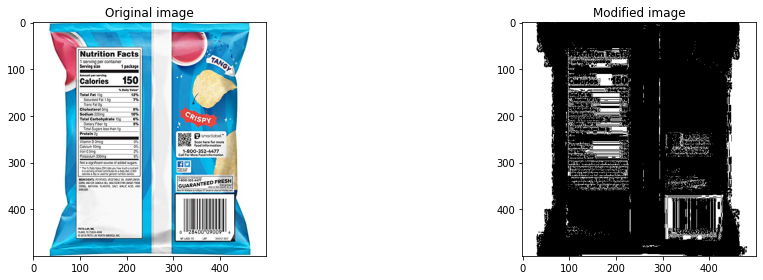

In [20]:
from matplotlib import pyplot as plt

plt.figure(0, figsize=(16, 4))
plt.subplot(121), plt.imshow(im), plt.title('Original image')
plt.subplot(122), plt.imshow(r, cmap='gray'), plt.title('Modified image')
plt.tight_layout()
plt.show()

In [22]:
import cv2
import numpy as np
img = cv2.imread('lays.jpg') #load rgb image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv

h, s, v = cv2.split(hsv)
v += 255
final_hsv = cv2.merge((h, s, v))

img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
cv2.imwrite("image_processed.jpg", img)

True

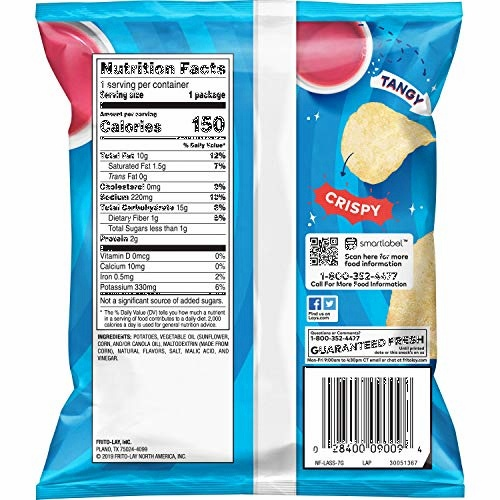

In [23]:
# show an image increase quality
import PIL
from PIL import ImageDraw
im = PIL.Image.open("image_processed.jpg")
#im = PIL.Image.open("france.jfif")

im

In [24]:
#draw border image

import cv2
import numpy as np

filename = 'lays.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
img = cv2.imread('lays.jpg', 0)
ret, thresh = cv2.threshold(img, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


ValueError: not enough values to unpack (expected 3, got 2)